This section contains the code building LDA topic model using documents tf-idf vectors.

In [7]:
import pandas as pd
import gensim
import pickle
from gensim.models import CoherenceModel


n_topics = 10

with open('dictionary_r.pkl', 'rb') as fp:
    dictionary_r = pickle.load(fp)
# dictionary_r.filter_extremes(no_below=10, no_above=0.5)
    
with open('corpus_r.pkl', 'rb') as fp:
    corpus_r = pickle.load(fp)

In [8]:
from gensim.models import TfidfModel

In [18]:
model = TfidfModel(corpus_r)

In [19]:
corpus_new = [model[i] for i in corpus_r]

In [20]:
with open('dictionary_r.pkl', 'rb') as fp:
    dictionary_r = pickle.load(fp)

In [21]:
len(dictionary_r)

22357

In [22]:
%%time
senlda_r_8 = gensim.models.ldamodel.LdaModel(corpus=corpus_new, id2word=dictionary_r, num_topics=8, alpha='auto', eta='auto')

#senlda_r.save('Models/Model_10')

CPU times: user 1min 4s, sys: 6.94 s, total: 1min 11s
Wall time: 51.1 s


In [23]:
%%time
senlda_r_21 = gensim.models.ldamodel.LdaModel(corpus=corpus_new, id2word=dictionary_r, num_topics=21, alpha='auto', eta='auto')


CPU times: user 1min 38s, sys: 10.6 s, total: 1min 49s
Wall time: 1min 9s


In [24]:
import pyLDAvis
import pyLDAvis.gensim 
pyLDAvis.enable_notebook()
vis8 = pyLDAvis.gensim.prepare(senlda_r_8, corpus_r, dictionary_r)
#pyLDAvis.save_html(vis, 'topic_model_2.html')
vis8

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.157573 -0.001179       1        1  33.788256
6     -0.154580  0.049386       2        1  26.772115
7     -0.151450  0.052350       3        1  19.492154
0     -0.094660  0.012644       4        1   8.631891
2      0.023771  0.000376       5        1   6.557441
4      0.026327 -0.199401       6        1   4.753525
5      0.254458  0.053642       7        1   0.002912
1      0.253706  0.032182       8        1   0.001706, topic_info=             Term           Freq          Total Category  logprob  loglift
1032    specified  203624.000000  203624.000000  Default  30.0000  30.0000
1075          tax  141702.000000  141702.000000  Default  29.0000  29.0000
1062       suffer  105784.000000  105784.000000  Default  28.0000  28.0000
3607   expedients   83164.000000   83164.000000  Default  27.0000  27.0000
2903     assembly  175081.000000  175081.000000  Default  26.0000  26.0000
...           ...            ...            ...      ...      ...      ...
1032    specified       0.363250  203624.316549   Topic8  -7.9498  -2.2580
1798   10/11/2013       0.261160   59388.468921   Topic8  -8.2797  -1.3558
3109  proprietary       0.273709   85210.724473   Topic8  -8.2328  -1.6699
1157         user       0.298198  264522.934596   Topic8  -8.1471  -2.7170
12       accounts       0.254713   55517.808751   Topic8  -8.3047  -1.3134

[525 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
1798      1  0.650564  10/11/2013
1798      2  0.035697  10/11/2013
1798      3  0.008874  10/11/2013
1798      4  0.082625  10/11/2013
1798      5  0.142452  10/11/2013
...     ...       ...         ...
1221      2  0.053921   research
1221      3  0.782247   research
1221      4  0.028331   research
1221      5  0.002498   research
1221      6  0.001401   research

[2489 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 7, 8, 1, 3, 5, 6, 2])

In [25]:
pyLDAvis.enable_notebook()
vis21 = pyLDAvis.gensim.prepare(senlda_r_21, corpus_r, dictionary_r)
#pyLDAvis.save_html(vis, 'topic_model_2.html')
vis21

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
16     0.299127  0.033911       1        1  47.068844
6      0.287427  0.027354       2        1  17.033305
5      0.271354  0.059487       3        1   8.868200
14     0.247301  0.146102       4        1   7.487329
8      0.203512 -0.163095       5        1   6.633027
19     0.233943 -0.022369       6        1   5.224147
15     0.204312 -0.193278       7        1   4.348145
11     0.087735  0.019245       8        1   2.504192
17    -0.022471  0.137736       9        1   0.676060
13    -0.159982 -0.018352      10        1   0.073291
7     -0.175243 -0.021588      11        1   0.036286
3     -0.130913 -0.058237      12        1   0.015551
9     -0.076358  0.037806      13        1   0.012099
18    -0.157788  0.001339      14        1   0.007035
1     -0.154984  0.001884      15        1   0.002851
0     -0.157951  0.002150      16        1   0.002605
10    -0.155166  0.000016      17        1   0.001436
4     -0.157557  0.007265      18        1   0.001414
20    -0.159878  0.000323      19        1   0.001409
12    -0.161296  0.001630      20        1   0.001402
2     -0.165124  0.000671      21        1   0.001372, topic_info=             Term           Freq          Total Category  logprob  loglift
1032    specified  239736.000000  239736.000000  Default  30.0000  30.0000
1075          tax  158765.000000  158765.000000  Default  29.0000  29.0000
153   calculation  119989.000000  119989.000000  Default  28.0000  28.0000
2903     assembly  160962.000000  160962.000000  Default  27.0000  27.0000
1952   chesapeake  106549.000000  106549.000000  Default  26.0000  26.0000
...           ...            ...            ...      ...      ...      ...
2758    character       0.040601   10329.356796  Topic21  -9.9228  -1.2498
1835      contain       0.041681  166586.092127  Topic21  -9.8966  -4.0041
636          like       0.041496  112355.817425  Topic21  -9.9010  -3.6147
553    increasing       0.041490  100600.523750  Topic21  -9.9012  -3.5043
84          april       0.041449  176094.383145  Topic21  -9.9022  -4.0651

[1428 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
1227      1  0.964824   1/22/2009
1227      2  0.002543   1/22/2009
1227      3  0.014126   1/22/2009
1227      4  0.003108   1/22/2009
1227      5  0.003673   1/22/2009
...     ...       ...         ...
1217      7  0.100438  effective
1217      8  0.150657  effective
1217      9  0.062774  effective
1217     10  0.025109  effective
1217     11  0.012555  effective

[8674 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[17, 7, 6, 15, 9, 20, 16, 12, 18, 14, 8, 4, 10, 19, 2, 1, 11, 5, 21, 13, 3])

In [27]:
model = gensim.models.ldamodel.LdaModel.load('Model_10')

In [99]:
print('topic_1')
model.show_topic(1, topn=20)

topic_1


[('properties', 0.020768909),
 ('ffo', 0.014447825),
 ('estate', 0.01343219),
 ('hotel', 0.012687361),
 ('tenant', 0.011564921),
 ('hotels', 0.010979516),
 ('real', 0.010758555),
 ('rental', 0.00965657),
 ('tenants', 0.009558344),
 ('reit', 0.00863726),
 ('square', 0.00834123),
 ('mortgage', 0.007997192),
 ('communities', 0.007389324),
 ('land', 0.0072034034),
 ('noi', 0.0068774386),
 ('joint', 0.006126543),
 ('ventures', 0.0058943448),
 ('homes', 0.005751983),
 ('redevelopment', 0.005487056),
 ('partnership', 0.0051283627)]

In [100]:
print('topic_0')
model.show_topic(0, topn=20)

topic_0


[('clearing', 0.009910796),
 ('ferrous', 0.009135349),
 ('adviser', 0.008667291),
 ('advisory', 0.0060481555),
 ('brokerage', 0.00498116),
 ('appreciation', 0.004687415),
 ('unrealized', 0.00428149),
 ('crs', 0.0042073457),
 ('llc', 0.0040144254),
 ('ppp', 0.0038171327),
 ('portfolio', 0.0033451722),
 ('broker', 0.003047833),
 ('trading', 0.0029996792),
 ('aspire', 0.0029015916),
 ('distributions', 0.002718976),
 ('advisor', 0.002702791),
 ('\x95', 0.002701439),
 ('quotations', 0.0026874235),
 ('sba', 0.0026130811),
 ('nav', 0.0025401325)]

In [101]:
print('topic_2')
model.show_topic(2, topn=20)

topic_2


[('loans', 0.018085152),
 ('deposits', 0.010644504),
 ('loan', 0.009517777),
 ('mortgage', 0.009110108),
 ('earning', 0.00782675),
 ('estate', 0.007369237),
 ('noninterest', 0.006992086),
 ('bearing', 0.0069732512),
 ('real', 0.0058576814),
 ('residential', 0.005469565),
 ('deposit', 0.005457751),
 ('nonperforming', 0.005428327),
 ('fhlb', 0.0052833077),
 ('portfolio', 0.004946002),
 ('\x97', 0.004940598),
 ('bank', 0.0043428745),
 ('banking', 0.003939457),
 ('reinsurance', 0.0038150083),
 ('nonaccrual', 0.0037996485),
 ('offs', 0.0033757328)]

In [102]:
print('topic_3')
model.show_topic(3, topn=20)

topic_3


[('advisory', 0.0006001247),
 ('mutual', 0.0005655755),
 ('client', 0.00041065746),
 ('institutional', 0.00035438556),
 ('inflows', 0.00029372342),
 ('seed', 0.00024580132),
 ('outflows', 0.00023865081),
 ('collective', 0.00023796907),
 ('appreciation', 0.00020892995),
 ('portfolios', 0.00020196877),
 ('clients', 0.0002008127),
 ('advisors', 0.00020061187),
 ('advisor', 0.0002003812),
 ('clinical', 0.0001970367),
 ('12b-1', 0.00018969267),
 ('class', 0.00018516237),
 ('trust', 0.0001840965),
 ('custody', 0.00017253008),
 ('wealth', 0.00015656358),
 ('pb', 0.00014898516)]

In [103]:
print('topic_4')
model.show_topic(4, topn=20)

topic_4


[('fiscal', 0.006048626),
 ('\x97', 0.002707248),
 ('segment', 0.0026842859),
 ('company\x92s', 0.0025004847),
 ('pension', 0.0023960616),
 ('store', 0.0021368926),
 ('software', 0.0021211952),
 ('stores', 0.0021052563),
 ('currency', 0.0020221288),
 ('profit', 0.0020150722),
 ('foreign', 0.0019587101),
 ('\x95', 0.0018559643),
 ('restructuring', 0.0018547294),
 ('percent', 0.001831777),
 ('contents', 0.0018172738),
 ('inventory', 0.0018008861),
 ('goodwill', 0.0017339811),
 ('sg&a', 0.0017097469),
 ('ebitda', 0.0016149859),
 ('solutions', 0.0014919227)]

In [104]:
print('topic_5')
model.show_topic(5, topn=20)

topic_5


[('gas', 0.02386176),
 ('\u200b', 0.022750214),
 ('oil', 0.017635096),
 ('natural', 0.011836313),
 ('drilling', 0.008842126),
 ('energy', 0.006912094),
 ('crude', 0.0062071704),
 ('electric', 0.006027883),
 ('exploration', 0.005546018),
 ('proved', 0.0054389373),
 ('water', 0.005203955),
 ('production', 0.004499567),
 ('wells', 0.0044758376),
 ('transmission', 0.00443479),
 ('fuel', 0.0043257503),
 ('properties', 0.0040968643),
 ('rig', 0.003994448),
 ('coal', 0.003942259),
 ('rigs', 0.0039020185),
 ('utility', 0.003527731)]

In [105]:
print('topic_6')
model.show_topic(6, topn=20)

topic_6


[('broadcast', 0.022697711),
 ('television', 0.019058693),
 ('programming', 0.017365005),
 ('satellite', 0.014622669),
 ('stations', 0.010789124),
 ('comcast', 0.010639121),
 ('satellites', 0.010535648),
 ('tv', 0.007280252),
 ('station', 0.006919767),
 ('broadcasting', 0.0067663854),
 ('cable', 0.005269275),
 ('subscriber', 0.00526062),
 ('exhibition', 0.0043930276),
 ('film', 0.004167363),
 ('nbc', 0.004044011),
 ('flavors', 0.004037559),
 ('advertising', 0.003774554),
 ('disney', 0.003740094),
 ('subscribers', 0.0034672704),
 ('networks', 0.003399681)]

In [106]:
print('topic_7')
model.show_topic(7, topn=20)

topic_7


[('students', 0.027724305),
 ('student', 0.02304215),
 ('fuel', 0.017737066),
 ('vessels', 0.0140165705),
 ('intermodal', 0.013102369),
 ('campuses', 0.009158805),
 ('charter', 0.008900442),
 ('surcharge', 0.008718944),
 ('transportation', 0.008586833),
 ('freight', 0.007417172),
 ('cargo', 0.0069942106),
 ('fruit', 0.0065832273),
 ('container', 0.006473032),
 ('foodservice', 0.006447549),
 ('fleet', 0.0059661153),
 ('educational', 0.0057184333),
 ('miles', 0.0056382166),
 ('surcharges', 0.0049598757),
 ('tonnage', 0.004851053),
 ('admissions', 0.0043941243)]

In [107]:
print('topic_8')
model.show_topic(8, topn=20)

topic_8


[('clinical', 0.018806169),
 ('research', 0.009004822),
 ('candidates', 0.006994466),
 ('trials', 0.0068696192),
 ('milestone', 0.0066780155),
 ('trial', 0.0063929292),
 ('patients', 0.0062877354),
 ('drug', 0.0060221627),
 ('license', 0.005159913),
 ('warrants', 0.0051564216),
 ('collaboration', 0.0049940157),
 ('phase', 0.004104954),
 ('commercialization', 0.004076817),
 ('patient', 0.0039057452),
 ('patent', 0.003856923),
 ('®', 0.003702018),
 ('pharmaceutical', 0.0036845768),
 ('study', 0.0031639454),
 ('product', 0.0029290523),
 ('development', 0.0029258763)]

In [108]:
print('topic_9')
model.show_topic(9, topn=20)

topic_9


[('gold', 0.02506367),
 ('silver', 0.017101843),
 ('ounces', 0.01420056),
 ('ounce', 0.011100403),
 ('oz', 0.0034009917),
 ('leach', 0.0033085777),
 ('mining', 0.0018502402),
 ('metals', 0.0016440686),
 ('metal', 0.0013581603),
 ('precious', 0.0013083852),
 ('sfr', 0.00064637896),
 ('nuclear', 0.00049620034),
 ('exelon', 0.00044960636),
 ('mill', 0.00042337037),
 ('mineral', 0.00031697942),
 ('acc', 0.00028418328),
 ('nevada', 0.00024413785),
 ('fy', 0.00023503647),
 ('exploration', 0.00018067876),
 ('delineate', 0.00016569548)]

In [35]:
# Visualize the topics
import pyLDAvis
import pyLDAvis.gensim 
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(model, corpus_r, dictionary_r)
pyLDAvis.save_html(vis, 'topic_model_10_tfidf.html')
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.173619 -0.072287       1        1  90.597198
5      0.131637  0.021427       2        1   3.863083
8      0.146331 -0.170660       3        1   3.007329
2      0.195909  0.053521       4        1   1.963761
6     -0.181037 -0.013235       5        1   0.429591
1      0.112728  0.188726       6        1   0.116715
0     -0.071802 -0.004140       7        1   0.008308
9     -0.169562 -0.009097       8        1   0.007532
7     -0.181533  0.015657       9        1   0.004565
3     -0.156290 -0.009912      10        1   0.001920, topic_info=             Term           Freq          Total Category  logprob  loglift
5458        store  117238.000000  117238.000000  Default  30.0000  30.0000
2243              160350.000000  160350.000000  Default  29.0000  29.0000
2735              111316.000000  111316.000000  Default  28.0000  28.0000
3660         fuel   35086.000000   35086.000000  Default  27.0000  27.0000
196     companys  140696.000000  140696.000000  Default  26.0000  26.0000
...           ...            ...            ...      ...      ...      ...
591    investment       0.149935   20389.981805  Topic10  -8.9526  -0.9596
7762  partnership       0.143028   12907.710285  Topic10  -8.9997  -0.5495
1560      managed       0.144494   20033.418676  Topic10  -8.9895  -0.9789
469         funds       0.138073   14075.808521  Topic10  -9.0350  -0.6714
6006        trial       0.133644   14736.846146  Topic10  -9.0676  -0.7499

[633 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
5700      1  0.451389  1.4)%
5700      2  0.175540  1.4)%
5700      3  0.100309  1.4)%
5700      4  0.050154  1.4)%
5700      5  0.225694  1.4)%
...     ...       ...    ...
6394      2  0.999375      ​
6394      3  0.000094      ​
6394      4  0.000038      ​
6394      5  0.000170      ​
6394      6  0.000019      ​

[3338 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 6, 9, 3, 7, 2, 1, 10, 8, 4])

In [37]:
import pandas as pd
ldaDF = pd.DataFrame({
        'id' : list(range(len(corpus_r))),
        'topics' : [model.get_document_topics(bow) for bow in corpus_r]
    })

In [38]:
ldaDF

,id,topics
0,0,"[(4, 0.94007474), (5, 0.023257272), (8, 0.0364..."
1,1,"[(4, 0.9194534), (5, 0.032169823), (8, 0.04177..."
2,2,"[(2, 0.029040271), (4, 0.92276216), (5, 0.0309..."
3,3,"[(2, 0.026532795), (4, 0.9093174), (5, 0.05521..."
4,4,"[(2, 0.027653342), (4, 0.9164875), (5, 0.03983..."
...,...,...
37715,37715,"[(4, 0.98589116), (5, 0.013815265)]"
37716,37716,"[(1, 0.010900105), (2, 0.027566696), (4, 0.949..."
37717,37717,"[(1, 0.030234037), (4, 0.9397213), (5, 0.01774..."
37718,37718,"[(4, 0.9474341), (5, 0.020465346), (8, 0.03001..."


In [40]:
#Dict to temporally hold the probabilities
topicsProbDict = {i : [0] * len(ldaDF) for i in range(10)}

#Load them into the dict
for index, topicTuples in enumerate(ldaDF['topics']):
    for topicNum, prob in topicTuples:
        topicsProbDict[topicNum][index] = prob

#Update the DataFrame
for topicNum in range(10):
    ldaDF['topic_{}'.format(topicNum)] = topicsProbDict[topicNum]

ldaDF

,id,topics,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
0,0,"[(4, 0.94007474), (5, 0.023257272), (8, 0.0364...",0.0,0.000000,0.000000,0.0,0.940075,0.023257,0.0,0.0,0.036472,0.0
1,1,"[(4, 0.9194534), (5, 0.032169823), (8, 0.04177...",0.0,0.000000,0.000000,0.0,0.919453,0.032170,0.0,0.0,0.041774,0.0
2,2,"[(2, 0.029040271), (4, 0.92276216), (5, 0.0309...",0.0,0.000000,0.029040,0.0,0.922762,0.030910,0.0,0.0,0.017117,0.0
3,3,"[(2, 0.026532795), (4, 0.9093174), (5, 0.05521...",0.0,0.000000,0.026533,0.0,0.909317,0.055215,0.0,0.0,0.000000,0.0
4,4,"[(2, 0.027653342), (4, 0.9164875), (5, 0.03983...",0.0,0.000000,0.027653,0.0,0.916488,0.039835,0.0,0.0,0.015846,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
37715,37715,"[(4, 0.98589116), (5, 0.013815265)]",0.0,0.000000,0.000000,0.0,0.985891,0.013815,0.0,0.0,0.000000,0.0
37716,37716,"[(1, 0.010900105), (2, 0.027566696), (4, 0.949...",0.0,0.010900,0.027567,0.0,0.949979,0.000000,0.0,0.0,0.000000,0.0
37717,37717,"[(1, 0.030234037), (4, 0.9397213), (5, 0.01774...",0.0,0.030234,0.000000,0.0,0.939721,0.017746,0.0,0.0,0.000000,0.0
37718,37718,"[(4, 0.9474341), (5, 0.020465346), (8, 0.03001...",0.0,0.000000,0.000000,0.0,0.947434,0.020465,0.0,0.0,0.030019,0.0


In [41]:

with open('topic_change_10_topics.pickle', 'wb') as handle:
    pickle.dump(ldaDF, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [52]:
with open('../indus_wanted.pickle', 'rb') as fp:
    indus_wanted = pickle.load(fp)
indus_wanted 

,gvkey,FDATE,permno,ma_ret,RET,vwret,FName,gind,wanted1,wanted2,wanted3,wanted4,category,year
7,11903,20100114,10025,-0.030430,0.023926,0.0024,0001193125-10-006494.txt,151030.0,False,True,False,False,material,2010.0
8,11903,20110114,10025,0.066290,0.066775,0.0069,0001193125-11-008295.txt,151030.0,False,True,False,False,material,2011.0
9,11903,20120117,10025,0.034458,0.029080,0.0036,0001193125-12-013914.txt,151030.0,False,True,False,False,material,2012.0
10,11903,20130122,10025,-0.004012,0.000162,0.0048,0001193125-13-019043.txt,151030.0,False,True,False,False,material,2013.0
11,11903,20140114,10025,0.012214,0.035475,0.0115,0001193125-14-010742.txt,151030.0,False,True,False,False,material,2014.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37715,66228,20100728,93398,-0.110737,0.001770,-0.0082,0000943440-10-000447.txt,101020.0,True,False,False,False,energy,2010.0
37716,66228,20110729,93398,-0.426273,-0.183333,-0.0056,0000943440-11-000404.txt,101020.0,True,False,False,False,energy,2011.0
37717,66228,20120716,93398,-0.122059,-0.054348,-0.0031,0000785968-12-000030.txt,101020.0,True,False,False,False,energy,2012.0
37718,66228,20130715,93398,-0.003624,-0.007389,0.0020,0000785968-13-000065.txt,101020.0,True,False,False,False,energy,2013.0


In [44]:
ldaDF.index

RangeIndex(start=0, stop=37720, step=1)

In [45]:
ldaDF_wanted = ldaDF[ldaDF.index.isin(indus_wanted.index)]

In [47]:
ldaDF_wanted.shape

(16411, 12)

In [48]:
ldaDF_wanted

,id,topics,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9
7,7,"[(4, 0.9362042), (5, 0.022105658), (8, 0.04009...",0.0,0.000000,0.000000,0.0,0.936204,0.022106,0.0,0.0,0.040093,0.0
8,8,"[(4, 0.9450482), (5, 0.015232279), (8, 0.03780...",0.0,0.000000,0.000000,0.0,0.945048,0.015232,0.0,0.0,0.037801,0.0
9,9,"[(4, 0.9516358), (5, 0.020684857), (8, 0.02576...",0.0,0.000000,0.000000,0.0,0.951636,0.020685,0.0,0.0,0.025765,0.0
10,10,"[(4, 0.9462697), (5, 0.021454994), (8, 0.03032...",0.0,0.000000,0.000000,0.0,0.946270,0.021455,0.0,0.0,0.030325,0.0
11,11,"[(4, 0.9385558), (5, 0.023123084), (8, 0.02822...",0.0,0.000000,0.000000,0.0,0.938556,0.023123,0.0,0.0,0.028227,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
37715,37715,"[(4, 0.98589116), (5, 0.013815265)]",0.0,0.000000,0.000000,0.0,0.985891,0.013815,0.0,0.0,0.000000,0.0
37716,37716,"[(1, 0.010900105), (2, 0.027566696), (4, 0.949...",0.0,0.010900,0.027567,0.0,0.949979,0.000000,0.0,0.0,0.000000,0.0
37717,37717,"[(1, 0.030234037), (4, 0.9397213), (5, 0.01774...",0.0,0.030234,0.000000,0.0,0.939721,0.017746,0.0,0.0,0.000000,0.0
37718,37718,"[(4, 0.9474341), (5, 0.020465346), (8, 0.03001...",0.0,0.000000,0.000000,0.0,0.947434,0.020465,0.0,0.0,0.030019,0.0


In [53]:
ldaDF_wanted['year'] = list(indus_wanted['year'])
ldaDF_wanted['category'] = list(indus_wanted['category'])

/Users/daphne/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/daphne/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [63]:
indus_wanted

,gvkey,FDATE,permno,ma_ret,RET,vwret,FName,gind,wanted1,wanted2,wanted3,wanted4,category,year
7,11903,20100114,10025,-0.030430,0.023926,0.0024,0001193125-10-006494.txt,151030.0,False,True,False,False,material,2010.0
8,11903,20110114,10025,0.066290,0.066775,0.0069,0001193125-11-008295.txt,151030.0,False,True,False,False,material,2011.0
9,11903,20120117,10025,0.034458,0.029080,0.0036,0001193125-12-013914.txt,151030.0,False,True,False,False,material,2012.0
10,11903,20130122,10025,-0.004012,0.000162,0.0048,0001193125-13-019043.txt,151030.0,False,True,False,False,material,2013.0
11,11903,20140114,10025,0.012214,0.035475,0.0115,0001193125-14-010742.txt,151030.0,False,True,False,False,material,2014.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37715,66228,20100728,93398,-0.110737,0.001770,-0.0082,0000943440-10-000447.txt,101020.0,True,False,False,False,energy,2010.0
37716,66228,20110729,93398,-0.426273,-0.183333,-0.0056,0000943440-11-000404.txt,101020.0,True,False,False,False,energy,2011.0
37717,66228,20120716,93398,-0.122059,-0.054348,-0.0031,0000785968-12-000030.txt,101020.0,True,False,False,False,energy,2012.0
37718,66228,20130715,93398,-0.003624,-0.007389,0.0020,0000785968-13-000065.txt,101020.0,True,False,False,False,energy,2013.0


In [54]:
ldaDF_wanted

,id,topics,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,year,category
7,7,"[(4, 0.9362042), (5, 0.022105658), (8, 0.04009...",0.0,0.000000,0.000000,0.0,0.936204,0.022106,0.0,0.0,0.040093,0.0,2010.0,material
8,8,"[(4, 0.9450482), (5, 0.015232279), (8, 0.03780...",0.0,0.000000,0.000000,0.0,0.945048,0.015232,0.0,0.0,0.037801,0.0,2011.0,material
9,9,"[(4, 0.9516358), (5, 0.020684857), (8, 0.02576...",0.0,0.000000,0.000000,0.0,0.951636,0.020685,0.0,0.0,0.025765,0.0,2012.0,material
10,10,"[(4, 0.9462697), (5, 0.021454994), (8, 0.03032...",0.0,0.000000,0.000000,0.0,0.946270,0.021455,0.0,0.0,0.030325,0.0,2013.0,material
11,11,"[(4, 0.9385558), (5, 0.023123084), (8, 0.02822...",0.0,0.000000,0.000000,0.0,0.938556,0.023123,0.0,0.0,0.028227,0.0,2014.0,material
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37715,37715,"[(4, 0.98589116), (5, 0.013815265)]",0.0,0.000000,0.000000,0.0,0.985891,0.013815,0.0,0.0,0.000000,0.0,2010.0,energy
37716,37716,"[(1, 0.010900105), (2, 0.027566696), (4, 0.949...",0.0,0.010900,0.027567,0.0,0.949979,0.000000,0.0,0.0,0.000000,0.0,2011.0,energy
37717,37717,"[(1, 0.030234037), (4, 0.9397213), (5, 0.01774...",0.0,0.030234,0.000000,0.0,0.939721,0.017746,0.0,0.0,0.000000,0.0,2012.0,energy
37718,37718,"[(4, 0.9474341), (5, 0.020465346), (8, 0.03001...",0.0,0.000000,0.000000,0.0,0.947434,0.020465,0.0,0.0,0.030019,0.0,2013.0,energy


In [64]:
ldaDF_wanted['gind'] = indus_wanted['gind']

/Users/daphne/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [75]:
ldaDF_wanted['FDATE'] = indus_wanted['FDATE']

/Users/daphne/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [76]:
ldaDF_wanted

,id,topics,topic_0,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,year,category,gind,FDATE
7,7,"[(4, 0.9362042), (5, 0.022105658), (8, 0.04009...",0.0,0.000000,0.000000,0.0,0.936204,0.022106,0.0,0.0,0.040093,0.0,2010.0,material,151030.0,20100114
8,8,"[(4, 0.9450482), (5, 0.015232279), (8, 0.03780...",0.0,0.000000,0.000000,0.0,0.945048,0.015232,0.0,0.0,0.037801,0.0,2011.0,material,151030.0,20110114
9,9,"[(4, 0.9516358), (5, 0.020684857), (8, 0.02576...",0.0,0.000000,0.000000,0.0,0.951636,0.020685,0.0,0.0,0.025765,0.0,2012.0,material,151030.0,20120117
10,10,"[(4, 0.9462697), (5, 0.021454994), (8, 0.03032...",0.0,0.000000,0.000000,0.0,0.946270,0.021455,0.0,0.0,0.030325,0.0,2013.0,material,151030.0,20130122
11,11,"[(4, 0.9385558), (5, 0.023123084), (8, 0.02822...",0.0,0.000000,0.000000,0.0,0.938556,0.023123,0.0,0.0,0.028227,0.0,2014.0,material,151030.0,20140114
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37715,37715,"[(4, 0.98589116), (5, 0.013815265)]",0.0,0.000000,0.000000,0.0,0.985891,0.013815,0.0,0.0,0.000000,0.0,2010.0,energy,101020.0,20100728
37716,37716,"[(1, 0.010900105), (2, 0.027566696), (4, 0.949...",0.0,0.010900,0.027567,0.0,0.949979,0.000000,0.0,0.0,0.000000,0.0,2011.0,energy,101020.0,20110729
37717,37717,"[(1, 0.030234037), (4, 0.9397213), (5, 0.01774...",0.0,0.030234,0.000000,0.0,0.939721,0.017746,0.0,0.0,0.000000,0.0,2012.0,energy,101020.0,20120716
37718,37718,"[(4, 0.9474341), (5, 0.020465346), (8, 0.03001...",0.0,0.000000,0.000000,0.0,0.947434,0.020465,0.0,0.0,0.030019,0.0,2013.0,energy,101020.0,20130715


In [59]:
year = list(range(2010, 2021))

colors = ['blue','olive','red','green','yellow','orange','black','purple','grey','navy','pink','cyan','magenta']

In [57]:
topic_words = {}
for i in range(10):
    topic_words['topic_{}'.format(i)] = model.show_topic(i, topn=20)

In [58]:
topic_words

{'topic_0': [('clearing', 0.009910796),
  ('ferrous', 0.009135349),
  ('adviser', 0.008667291),
  ('advisory', 0.0060481555),
  ('brokerage', 0.00498116),
  ('appreciation', 0.004687415),
  ('unrealized', 0.00428149),
  ('crs', 0.0042073457),
  ('llc', 0.0040144254),
  ('ppp', 0.0038171327),
  ('portfolio', 0.0033451722),
  ('broker', 0.003047833),
  ('trading', 0.0029996792),
  ('aspire', 0.0029015916),
  ('distributions', 0.002718976),
  ('advisor', 0.002702791),
  ('\x95', 0.002701439),
  ('quotations', 0.0026874235),
  ('sba', 0.0026130811),
  ('nav', 0.0025401325)],
 'topic_1': [('properties', 0.020768909),
  ('ffo', 0.014447825),
  ('estate', 0.01343219),
  ('hotel', 0.012687361),
  ('tenant', 0.011564921),
  ('hotels', 0.010979516),
  ('real', 0.010758555),
  ('rental', 0.00965657),
  ('tenants', 0.009558344),
  ('reit', 0.00863726),
  ('square', 0.00834123),
  ('mortgage', 0.007997192),
  ('communities', 0.007389324),
  ('land', 0.0072034034),
  ('noi', 0.0068774386),
  ('joint

In [97]:
lda_topic_compo = ldaDF_wanted.groupby(['category','gind','FDATE']).mean()
lda_topic_compo.head(130)

id  topic_0  topic_1   topic_2  topic_3  \
category gind     FDATE                                                         
IT       451010.0 20100204  35597.000000      0.0      0.0  0.000000      0.0   
                  20100223   4945.500000      0.0      0.0  0.000000      0.0   
                  20100224  12885.000000      0.0      0.0  0.000000      0.0   
                  20100226  20854.666667      0.0      0.0  0.016882      0.0   
                  20100301  13288.000000      0.0      0.0  0.015782      0.0   
...                                  ...      ...      ...       ...      ...   
                  20160316  21553.000000      0.0      0.0  0.032414      0.0   
                  20160420  22809.000000      0.0      0.0  0.026225      0.0   
                  20160606  17960.000000      0.0      0.0  0.000000      0.0   
                  20160620  17411.000000      0.0      0.0  0.073993      0.0   
                  20161028  25267.000000      0.0      0.0  0.000000      0.0   

                             topic_4   topic_5   topic_6  topic_7   topic_8  \
category gind     FDATE                                                       
IT       451010.0 20100204  0.948569  0.027947  0.000000      0.0  0.019555   
                  20100223  0.963286  0.016205  0.005806      0.0  0.009386   
                  20100224  0.871068  0.015219  0.000000      0.0  0.112560   
                  20100226  0.927781  0.025534  0.000000      0.0  0.025926   
                  20100301  0.963281  0.017482  0.000000      0.0  0.000000   
...                              ...       ...       ...      ...       ...   
                  20160316  0.925332  0.017157  0.015111      0.0  0.000000   
                  20160420  0.916889  0.020109  0.010248      0.0  0.026375   
                  20160606  0.932968  0.000000  0.021723      0.0  0.039669   
                  20160620  0.880496  0.000000  0.011759      0.0  0.030474   
                  20161028  0.937948  0.020636  0.000000      0.0  0.035007   

                            topic_9    year  
category gind     FDATE                      
IT       451010.0 20100204      0.0  2010.0  
                  20100223      0.0  2010.0  
                  20100224      0.0  2010.0  
                  20100226      0.0  2010.0  
                  20100301      0.0  2010.0  
...                             ...     ...  
                  20160316      0.0  2016.0  
                  20160420      0.0  2016.0  
                  20160606      0.0  2016.0  
                  20160620      0.0  2016.0  
                  20161028      0.0  2016.0  

[130 rows x 12 columns]

In [93]:
sum_ = 0
for i in list(lda_topic_compo.index):
    if i[1] == '451010.0':
        sum_+=1
sum_

130

In [73]:
row = lda_topic_compo[7:18]
row

id  topic_0   topic_1   topic_2  topic_3  \
category gind     year                                                         
IT       451020.0 2010.0  18677.300000      0.0  0.000298  0.019326      0.0   
                  2011.0  18740.969697      0.0  0.000572  0.026618      0.0   
                  2012.0  19236.176471      0.0  0.000275  0.025354      0.0   
                  2013.0  19349.352113      0.0  0.000295  0.023286      0.0   
                  2014.0  19057.684211      0.0  0.000359  0.023128      0.0   
                  2015.0  18747.090909      0.0  0.000339  0.029267      0.0   
                  2016.0  18523.776316      0.0  0.000210  0.027787      0.0   
                  2017.0  19827.421053      0.0  0.000221  0.022478      0.0   
                  2018.0  19495.342857      0.0  0.000444  0.021545      0.0   
                  2019.0  19277.469697      0.0  0.000525  0.021111      0.0   
                  2020.0  19103.727273      0.0  0.000206  0.024549      0.0   

                           topic_4   topic_5   topic_6  topic_7   topic_8  \
category gind     year                                                      
IT       451020.0 2010.0  0.927968  0.024219  0.002214      0.0  0.021314   
                  2011.0  0.917331  0.024329  0.002538      0.0  0.024355   
                  2012.0  0.925681  0.020603  0.002855      0.0  0.020094   
                  2013.0  0.925519  0.019425  0.003077      0.0  0.023606   
                  2014.0  0.924068  0.019948  0.002509      0.0  0.025482   
                  2015.0  0.918215  0.021173  0.002490      0.0  0.024774   
                  2016.0  0.920187  0.019573  0.002157      0.0  0.026145   
                  2017.0  0.922354  0.021438  0.002053      0.0  0.026292   
                  2018.0  0.924540  0.020197  0.002479      0.0  0.026326   
                  2019.0  0.920120  0.021941  0.002584      0.0  0.029910   
                  2020.0  0.917556  0.020840  0.002901      0.0  0.029185   

                          topic_9  
category gind     year             
IT       451020.0 2010.0      0.0  
                  2011.0      0.0  
                  2012.0      0.0  
                  2013.0      0.0  
                  2014.0      0.0  
                  2015.0      0.0  
                  2016.0      0.0  
                  2017.0      0.0  
                  2018.0      0.0  
                  2019.0      0.0  
                  2020.0      0.0

/Users/daphne/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


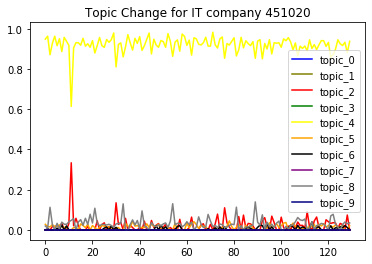

In [96]:
import matplotlib.pyplot as plt

row = lda_topic_compo[0:130]

plt.title('Topic Change for IT company 451020')


for i,k in enumerate(list(topic_words.keys())):

    plt.plot(list(range(130)), row[k],color=colors[i], label = k)

plt.legend()